In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
movies_df = pd.read_csv('tmdb-movies.csv')

In [3]:
movies_df.set_index('id', inplace= True)

In [4]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

C:\Users\Marwa.DESKTOP-9D64D1T\AppData\Local\Temp\ipykernel_31088\279456619.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])


In [5]:
movies_df = movies_df.drop(columns= ['imdb_id'], axis= 1)

In [6]:
movies_df.head()

,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
movies_df.shape

(10866, 19)

Handle missing Data

In [8]:
total_rows = movies_df.shape[0]

for col in movies_df.columns:
    nan_count = movies_df[col].isnull().sum()
    percentage_nan = (nan_count / total_rows) * 100
    print(f"{col}: {percentage_nan:.2f}%")

popularity: 0.00%
budget: 0.00%
revenue: 0.00%
original_title: 0.00%
cast: 0.70%
homepage: 72.98%
director: 0.40%
tagline: 25.99%
keywords: 13.74%
overview: 0.04%
runtime: 0.00%
genres: 0.21%
production_companies: 9.48%
release_date: 0.00%
vote_count: 0.00%
vote_average: 0.00%
release_year: 0.00%
budget_adj: 0.00%
revenue_adj: 0.00%


In [9]:
movies_df = movies_df.drop(columns= ['homepage'], axis= 1)

In [10]:
movies_df = movies_df.drop(columns= ['tagline'], axis= 1)

In [11]:
unknown_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
movies_df['production_companies', 'genres'] = unknown_imputer.fit_transform(movies_df[['production_companies', 'keywords', 'overview']])[:, 0]

In [12]:
movies_df['production_companies'].value_counts()

production_companies
Paramount Pictures                                                   156
Universal Pictures                                                   133
Warner Bros.                                                          84
Walt Disney Pictures                                                  76
Columbia Pictures                                                     72
                                                                    ... 
Peter Rogers Productions|Anglo-Amalgamated Film Distributors           1
Bruce Brown Films                                                      1
Cherokee Productions|Joel Productions|Douglas & Lewis Productions      1
Benedict Pictures Corp.                                                1
Universal Pictures|Stanley Donen Films                                 1
Name: count, Length: 7445, dtype: int64

In [13]:
movies_df["keywords"] = movies_df["keywords"].str.split('|')

movies_df = movies_df.explode('keywords')

In [14]:
movies_df.keywords.value_counts()

keywords
woman director      413
independent film    396
based on novel      278
sex                 272
sport               216
                   ... 
bar shootout          1
western town          1
lovelorn              1
peanuts               1
nazi hunter           1
Name: count, Length: 7878, dtype: int64

In [15]:
movies_df.dropna(subset=['director', 'cast', 'genres'], how= 'any')

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,"(production_companies, genres)"
id,,,,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,dna,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,tyrannosaurus rex,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,velociraptor,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,0.000000e+00,Norm-Iris
22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,gun,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,0.000000e+00,Norm-Iris
22293,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,drive,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,0.000000e+00,Norm-Iris


In [16]:
movies_df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,"(production_companies, genres)"
id,,,,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,dna,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,tyrannosaurus rex,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,velociraptor,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios|Amblin Entertainment|Legenda...


In [17]:
movies_df.cast.value_counts()

cast
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei             21
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    15
Sylvester Stallone|Talia Shire|Burt Young|Carl Weathers|Burgess Meredith            15
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    15
Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas Grabeel|Corbin Bleu                  15
                                                                                    ..
Larry Drake|Charles Durning|Robert F. Lyons|Claude Earl Jones|Lane Smith             1
Cate Blanchett|Minnie Driver|Rupert Everett|Julianne Moore|Jeremy Northam            1
Thomas Dekker|Lacey Chabert|Jane Singer|Nehemiah Persoff|Susan Boyd                  1
Susan Sarandon|Natalie Portman|Hart Bochner|Eileen Ryan|Ray Baker                    1
Peter Jones|Simon Jones|David Dixon|Sandra Dickinson|Mark Wing-Davey                 1
Name: count, Length: 10719, dtype: int

In [18]:
movies_df.to_csv('movies(cleaned).csv', index= True)

In [19]:
movies_df["genres"] = movies_df["genres"].str.split('|')

movies_df = movies_df.explode('genres')

In [20]:
movies_df.genres.value_counts()

genres
Drama              17577
Comedy             13428
Thriller           11049
Action              9044
Romance             6309
Horror              5910
Adventure           5767
Crime               5279
Science Fiction     4707
Family              4188
Fantasy             3409
Mystery             3079
Animation           2288
Documentary         1552
Music               1434
History             1338
War                 1093
Western              645
Foreign              510
TV Movie             507
Name: count, dtype: int64

Does the release month of a movie impact its overall success, such as revenue or popularity?

In [21]:
movies_df['month'] = movies_df['release_date'].dt.month

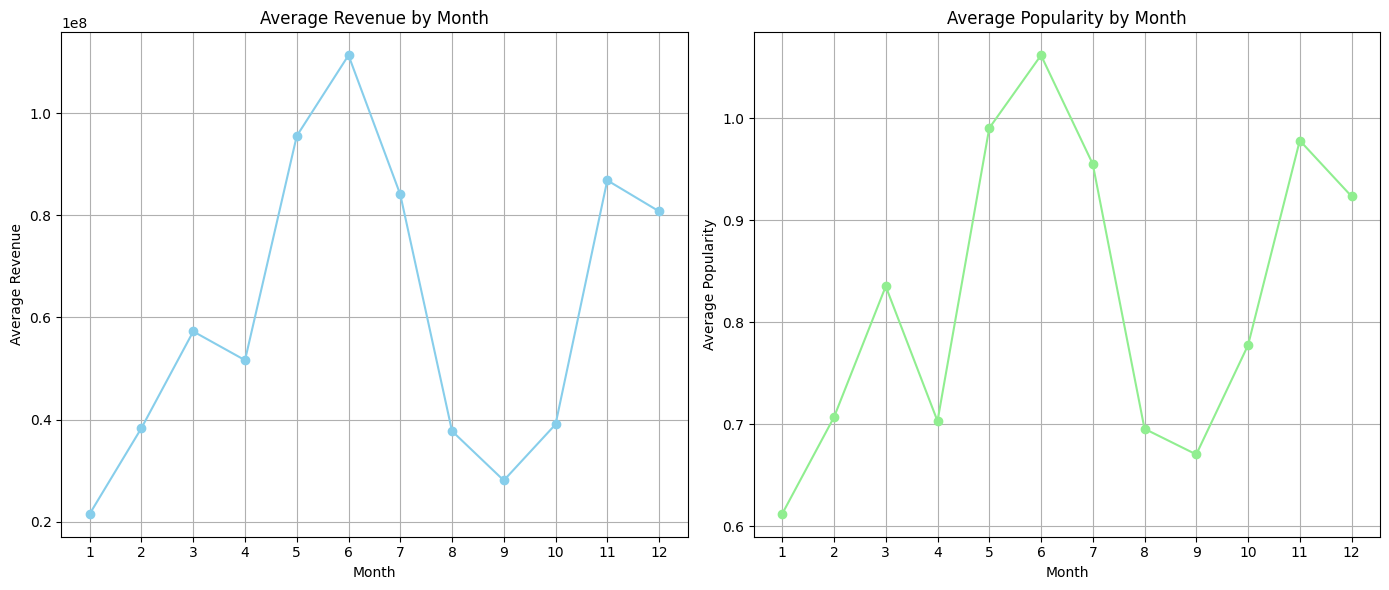

In [22]:
monthly_revenue = movies_df.groupby('month')['revenue'].mean()
monthly_popularity = movies_df.groupby('month')['popularity'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='skyblue', linestyle='-')
plt.title('Average Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(monthly_revenue.index)
plt.grid(True)

# Plot average popularity
plt.subplot(1, 2, 2)
plt.plot(monthly_popularity.index, monthly_popularity.values, marker='o', color='lightgreen', linestyle='-')
plt.title('Average Popularity by Month')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.xticks(monthly_popularity.index)
plt.grid(True)

plt.tight_layout()
plt.show()

How do the keywords associated with a movie correlate with its box office success?

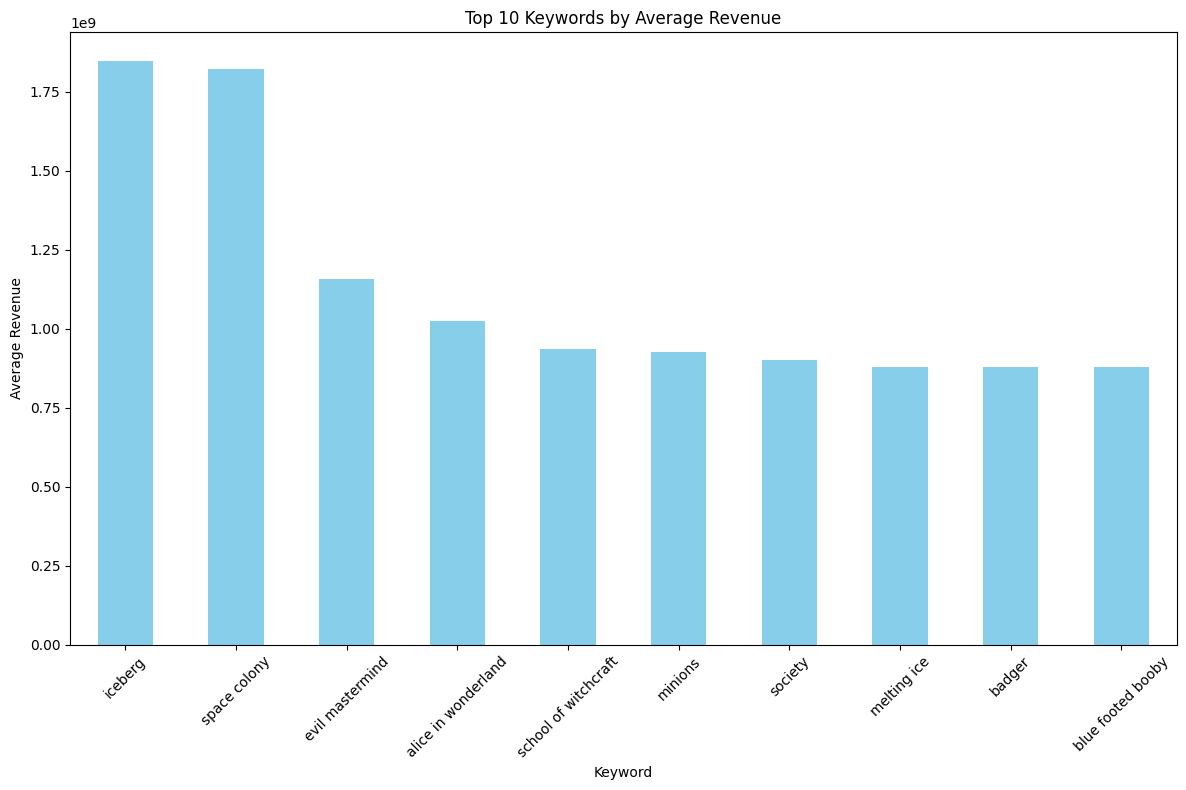

In [23]:
keyword_revenue = movies_df.groupby('keywords')['revenue'].mean().sort_values(ascending=False)

top_keywords = keyword_revenue.head(10)

# Plotting
plt.figure(figsize=(12, 8))
top_keywords.plot(kind='bar', color='skyblue')
plt.title('Top 10 Keywords by Average Revenue')
plt.xlabel('Keyword')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Does the budget make a dramatic difference?

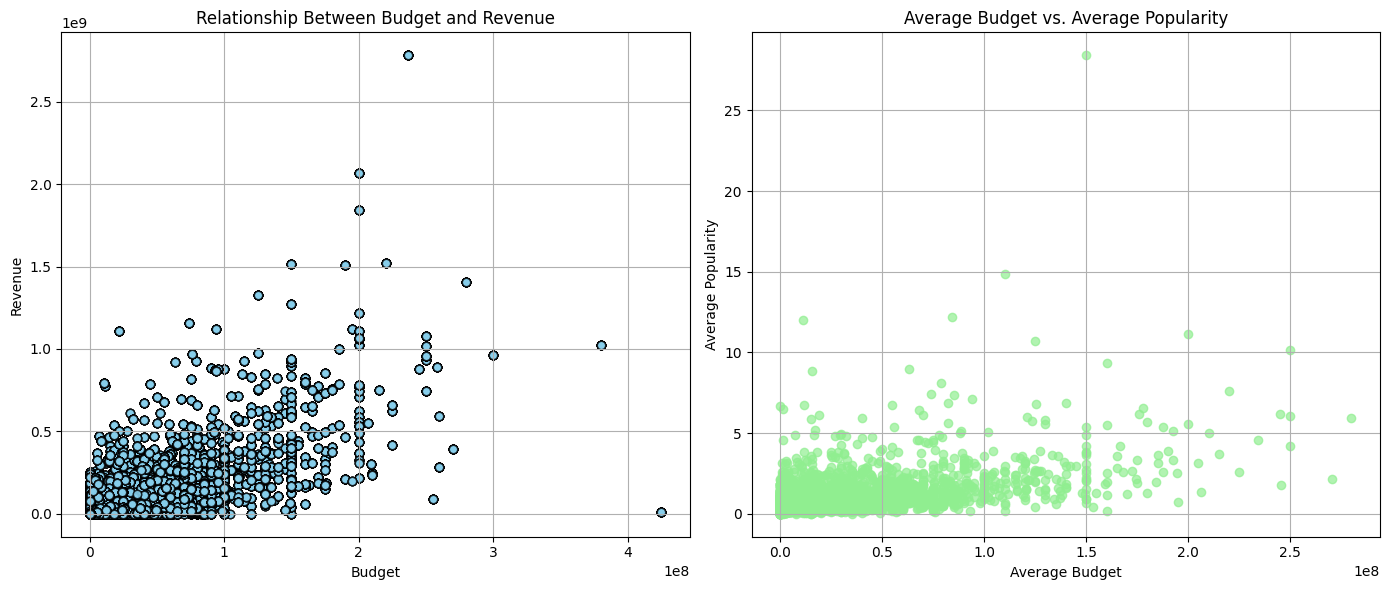

In [43]:
average_budget = movies_df.groupby('release_date')['budget'].mean()
average_popularity = movies_df.groupby('release_date')['popularity'].mean()

plot_df = pd.DataFrame({
    'Average Budget': average_budget,
    'Average Popularity': average_popularity
}).reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(movies_df['budget'], movies_df['revenue'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Relationship Between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(plot_df['Average Budget'], plot_df['Average Popularity'], color='lightgreen', alpha=0.7)
plt.title('Average Budget vs. Average Popularity')
plt.xlabel('Average Budget')
plt.ylabel('Average Popularity')
plt.grid(True)

plt.tight_layout()

plt.show()

What is the highest genre in votings?

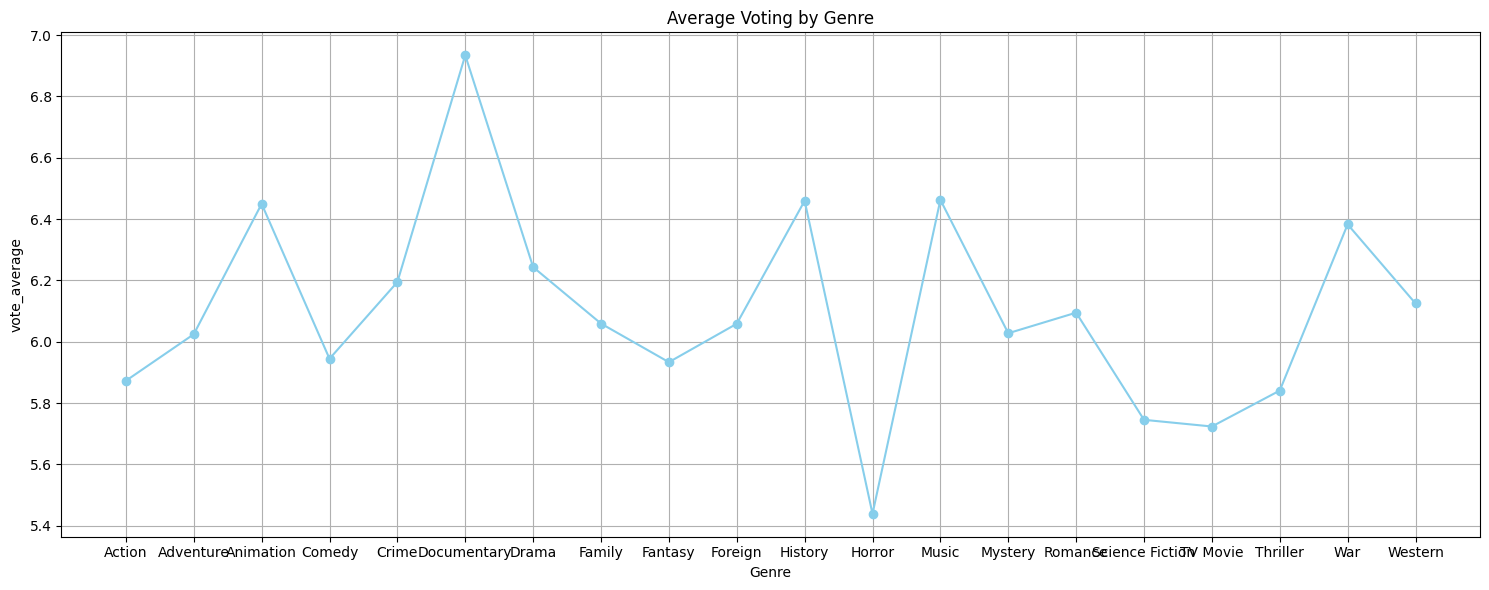

In [34]:
average_rating_by_genre = movies_df.groupby('genres')['vote_average'].mean()

plt.figure(figsize=(15, 6))
plt.plot(average_rating_by_genre.index, average_rating_by_genre.values, marker='o', linestyle='-', color='skyblue')

plt.title('Average Voting by Genre')
plt.xlabel('Genre')
plt.ylabel('vote_average')
plt.grid(True)

plt.tight_layout()
plt.show()

Which directors have directed the most high-revenue movies from 2010 to 2020?

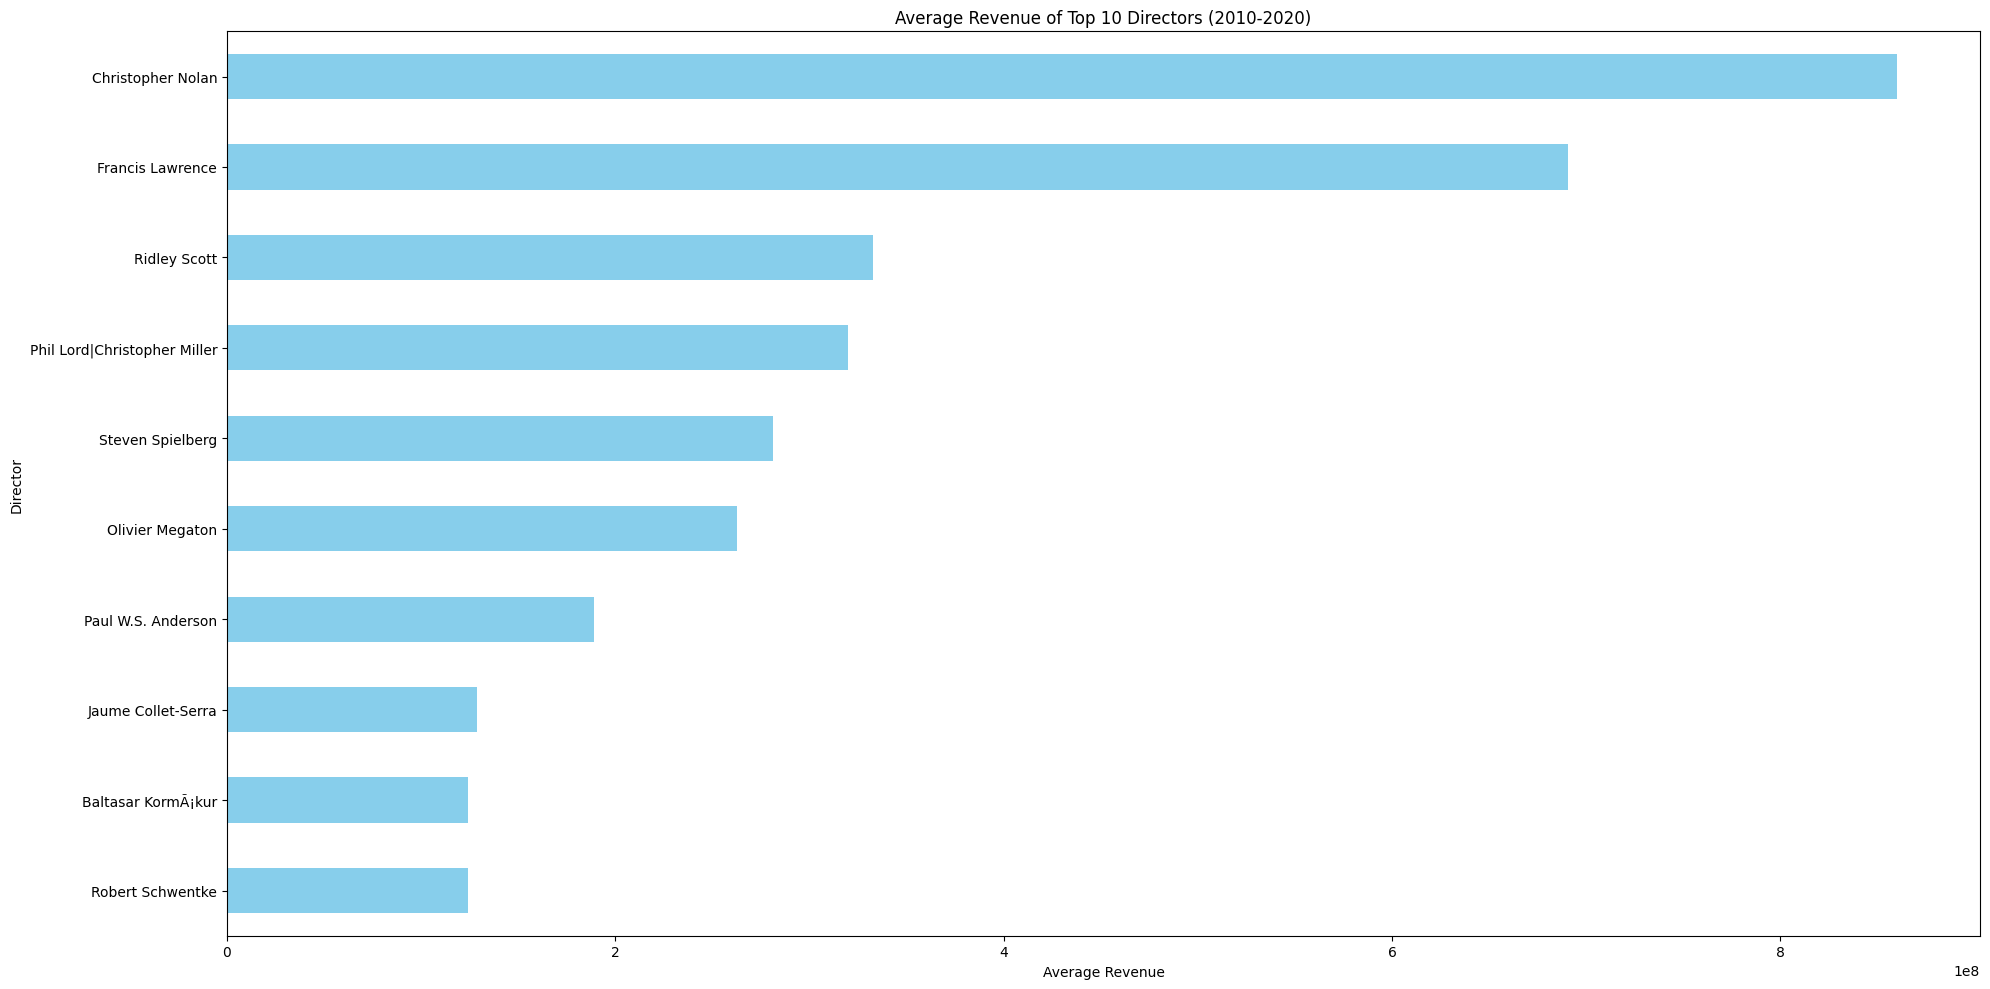

In [44]:
movies_df['year'] = movies_df['release_date'].dt.year

filtered_df = movies_df[(movies_df['year'] >= 2010) & (movies_df['year'] <= 2020)]

high_revenue_threshold = filtered_df['revenue'].quantile(0.75)

high_revenue_movies = filtered_df[filtered_df['revenue'] >= high_revenue_threshold]

high_revenue_by_director = high_revenue_movies['director'].value_counts()

top_10_directors = high_revenue_by_director.head(10).index

top_10_high_revenue_movies = high_revenue_movies[high_revenue_movies['director'].isin(top_10_directors)]

average_revenue_top_10 = top_10_high_revenue_movies.groupby('director')['revenue'].mean()

average_revenue_top_10 = average_revenue_top_10.sort_values(ascending=True)

plt.figure(figsize=(20, 10))
average_revenue_top_10.plot(kind='barh', color='skyblue')

plt.title('Average Revenue of Top 10 Directors (2010-2020)')
plt.xlabel('Average Revenue')
plt.ylabel('Director')

plt.tight_layout()
plt.show()